In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

from sklearn import preprocessing

In [60]:
df_train1 = pd.read_csv("/content/SalaryData_Train.csv")
df_test1 = pd.read_csv("/content/SalaryData_Test.csv")

In [61]:
df_train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
df_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [63]:
df_train1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [64]:
columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

label_encoder = preprocessing.LabelEncoder()

for i in columns:
    df_train1[i] = label_encoder.fit_transform(df_train1[i])
    df_test1[i] = label_encoder.fit_transform(df_test1[i])
    

In [65]:
df_train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [66]:
# split train and test data into x features and y target

train_x = df_train1.iloc[:, 0:13]
train_y = df_train1.iloc[:, 13]
test_x = df_test1.iloc[:, 0:13]
test_y = df_test1.iloc[:, 13]

In [67]:
train_x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [68]:
train_y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

In [69]:
print(train_x.shape)
print(train_y.shape)

(30161, 13)
(30161,)


### Applying naive bayes for classification

In [70]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.metrics import confusion_matrix

In [71]:
# Multinomial Naive Bayes

classifier_mb = MB()
classifier_mb.fit(train_x, train_y)
train_pred_m = classifier_mb.predict(train_x)
accuracy_train_m = np.mean(train_pred_m==train_y)

test_pred_m = classifier_mb.predict(test_x)
accuracy_test_m = np.mean(test_pred_m==test_y)

print('train acc ', accuracy_train_m)
print('test acc ', accuracy_test_m)

train acc  0.7729186698053778
test acc  0.7749667994687915


In [72]:
# Gaussian Naive Bayes

classifier_gb = GB()

# we need to convert tfidf into array format which is compatible for gaussian naive bayes

classifier_gb.fit(train_x.values, train_y.values) 
train_pred_g = classifier_gb.predict(train_x.values)
accuracy_train_g = np.mean(train_pred_g==train_y)

test_pred_g = classifier_gb.predict(test_x.values)
accuracy_test_g = np.mean(test_pred_g==test_y)

print('train acc ', accuracy_train_g)
print('test acc ', accuracy_test_g)

train acc  0.7953317197705646
test acc  0.7946879150066402


In [73]:
# Confusion Matrix

confusion_matrix = confusion_matrix(test_y, test_pred_g)
confusion_matrix

array([[10759,   601],
       [ 2491,  1209]])

In [74]:
#concatenate Train and Test datasets
salary = df_train1.append(salary_test)
salary.reset_index(inplace=True)
salary = salary.drop(['index'], axis=1) 
salary.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
45220,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [75]:
salary = pd.read_csv('SalaryData_Test.csv')
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [76]:
salary_more_than_50=pd.DataFrame()
salary_less_than_50=pd.DataFrame()

salary_more_than_50 = salary.loc[salary['Salary']==' >50K']

salary_less_than_50 = salary.loc[salary['Salary']==' <=50K']


salary.shape

(15060, 14)

In [77]:
#categorical_features

categorical_features = [feature for feature in salary.columns if salary[feature].dtypes == 'O']
print('categorical_features:', categorical_features) 

categorical_features: ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [78]:
for feature in categorical_features:
    print(salary[feature].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [79]:
#cardinality in categorical variables

for feature in categorical_features:
    print(feature, 'has', len(salary[feature].unique()), 'labels')

workclass has 7 labels
education has 16 labels
maritalstatus has 7 labels
occupation has 14 labels
relationship has 6 labels
race has 5 labels
sex has 2 labels
native has 40 labels
Salary has 2 labels


In [80]:
(salary_less_than_50.shape[0] + salary_more_than_50.shape[0]) ==salary.shape[0]

True

# Age distribution in reference with salary

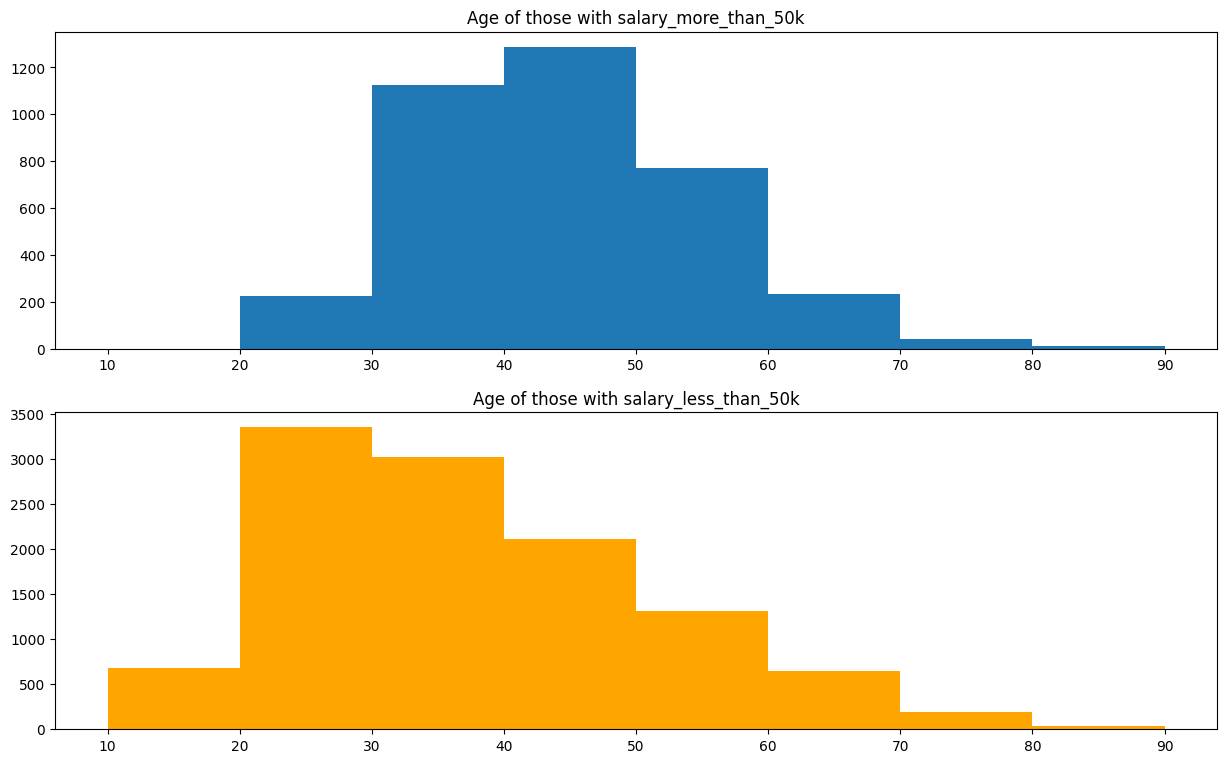

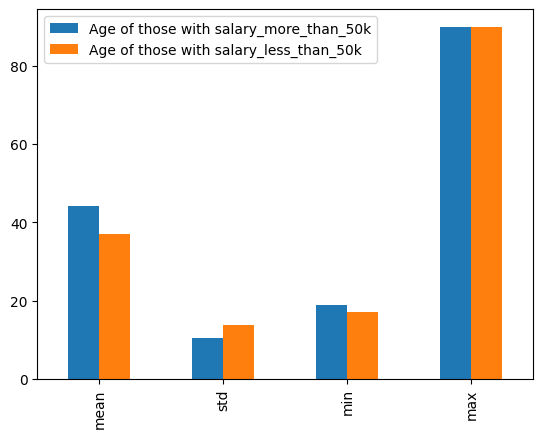

In [81]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.age, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.age, color = "orange", bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age of those with salary_less_than_50k')


age_describe = pd.DataFrame()

age_describe['Age of those with salary_more_than_50k'] = salary_more_than_50['age'].describe()
age_describe['Age of those with salary_less_than_50k'] = salary_less_than_50['age'].describe()

age_describe  = age_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
age_describe.plot.bar()

plt.show() 

# Hours/week distribution for salary

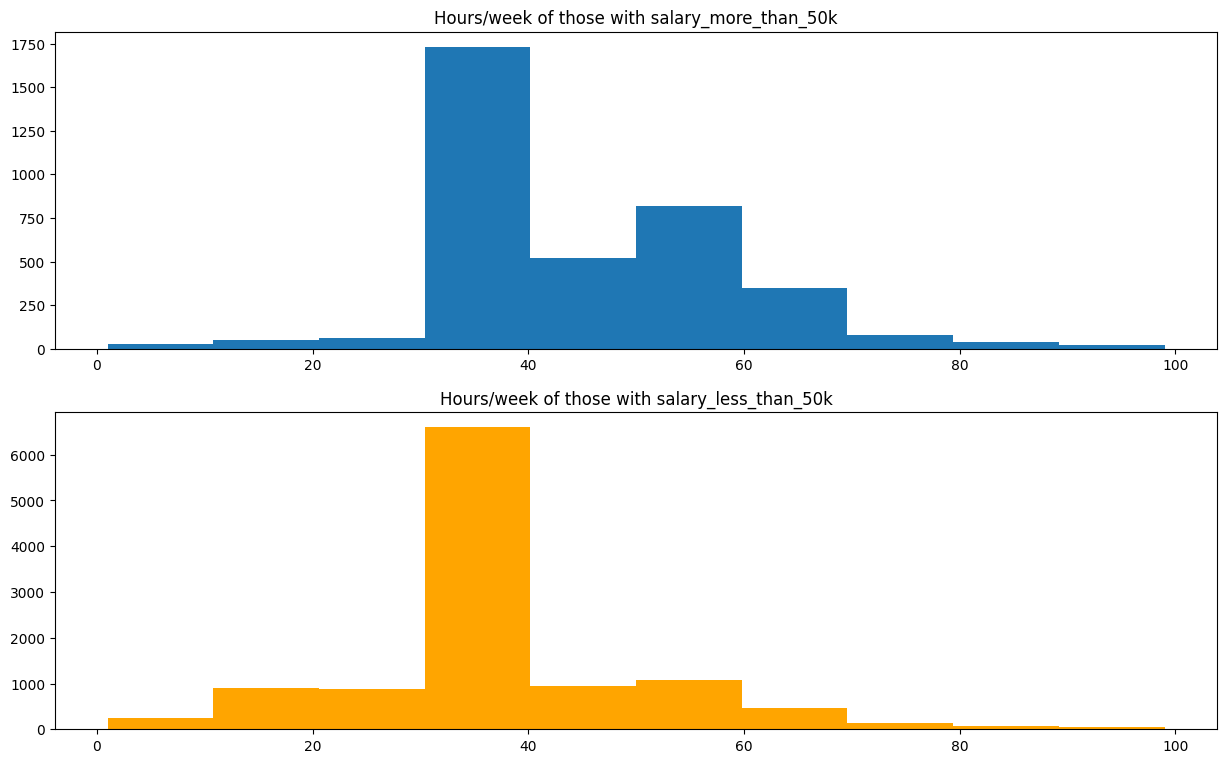

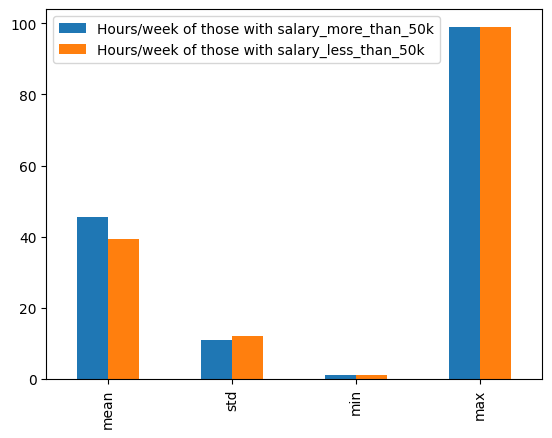

In [82]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.hoursperweek)
plt.title('Hours/week of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.hoursperweek, color = "orange")
plt.title('Hours/week of those with salary_less_than_50k')


Hoursweek_describe = pd.DataFrame()

Hoursweek_describe['Hours/week of those with salary_more_than_50k'] = salary_more_than_50['hoursperweek'].describe()
Hoursweek_describe['Hours/week of those with salary_less_than_50k'] = salary_less_than_50['hoursperweek'].describe()

Hoursweek_describe = Hoursweek_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
Hoursweek_describe.plot.bar()

plt.show() 

# Capital Gains distribution fro salary

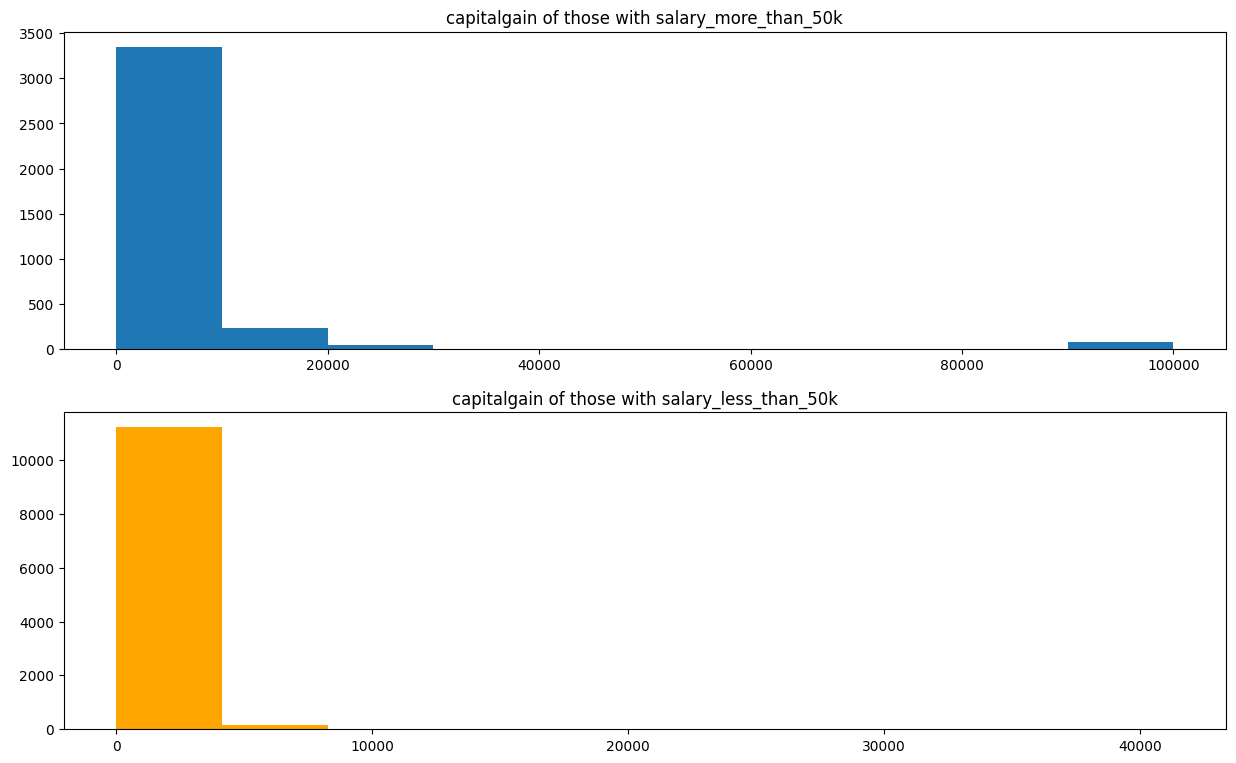

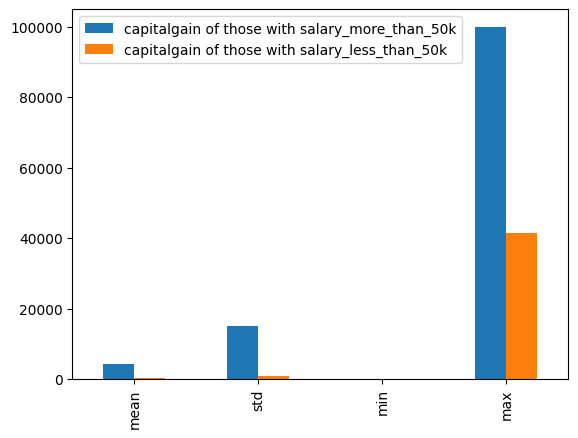

In [83]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.capitalgain)
plt.title('capitalgain of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.capitalgain, color = "orange")
plt.title('capitalgain of those with salary_less_than_50k')


capitalgain_describe = pd.DataFrame()

capitalgain_describe['capitalgain of those with salary_more_than_50k'] = salary_more_than_50['capitalgain'].describe()
capitalgain_describe['capitalgain of those with salary_less_than_50k'] = salary_less_than_50['capitalgain'].describe()

capitalgain_describe = capitalgain_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
capitalgain_describe.plot.bar()

plt.show() 

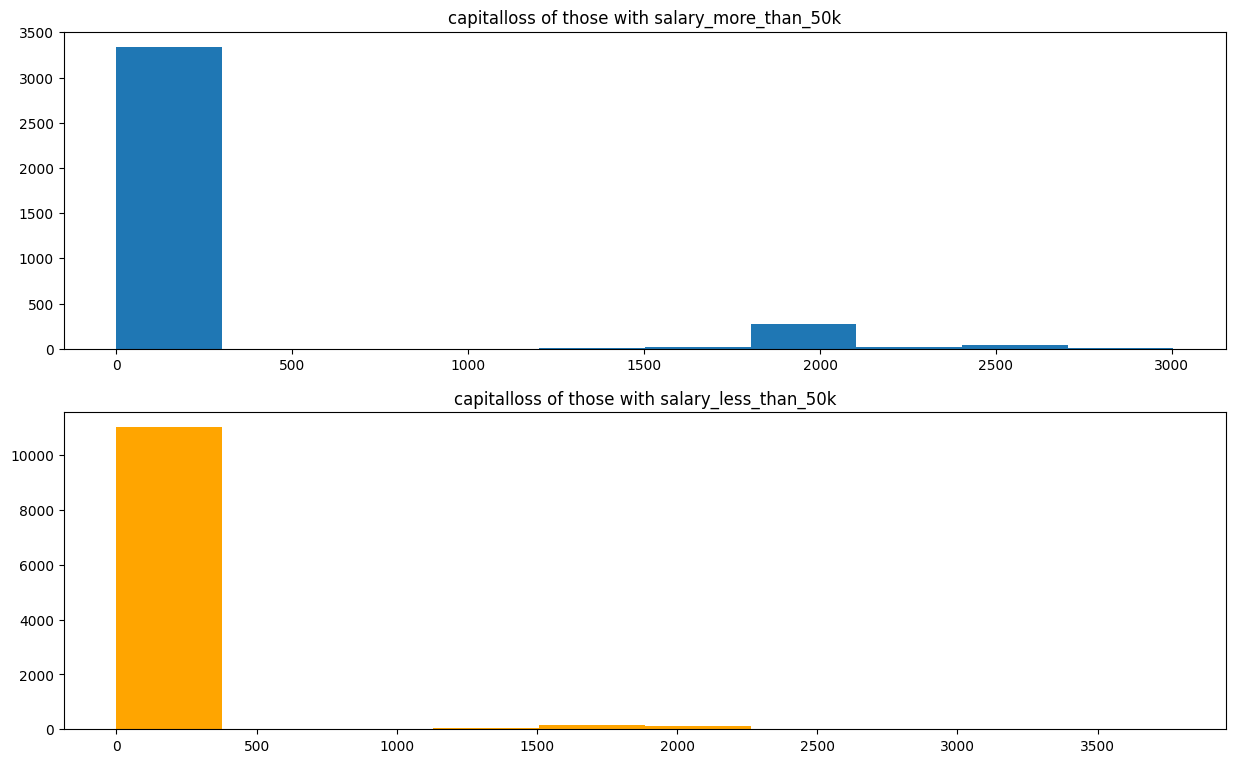

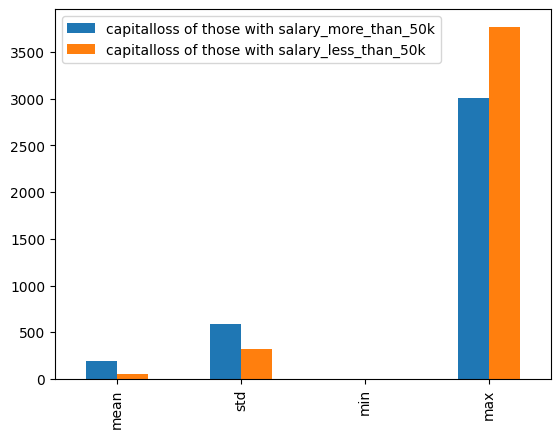

In [84]:

plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.capitalloss)
plt.title('capitalloss of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.capitalloss, color = "orange")
plt.title('capitalloss of those with salary_less_than_50k')


capitalloss_describe = pd.DataFrame()

capitalloss_describe['capitalloss of those with salary_more_than_50k'] = salary_more_than_50['capitalloss'].describe()
capitalloss_describe['capitalloss of those with salary_less_than_50k'] = salary_less_than_50['capitalloss'].describe()

capitalloss_describe = capitalloss_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
capitalloss_describe.plot.bar()

plt.show() 
     